In [1]:
"""
Exercise:

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use Z-Score of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result
"""

'\nExercise:\n\nYou are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,\n\n(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles\n\n(2) After removing outliers in step 1, you get a new dataframe.\n\n(3) On step(2) dataframe, use 4 standard deviation to remove outliers\n\n(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram\n\n(5) On step(2) dataframe, use Z-Score of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result\n'

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Suppress warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [5]:
""" 
From above, we can see the maximum is 12000000, which is too much for the price per sq ft. It looks like this dataset has some very bad outliers, so we will first remove those with percentiles and then use the z score.

Also plot a histogram to see how the data distribution.
"""

' \nFrom above, we can see the maximum is 12000000, which is too much for the price per sq ft. It looks like this dataset has some very bad outliers, so we will first remove those with percentiles and then use the z score.\n\nAlso plot a histogram to see how the data distribution.\n'

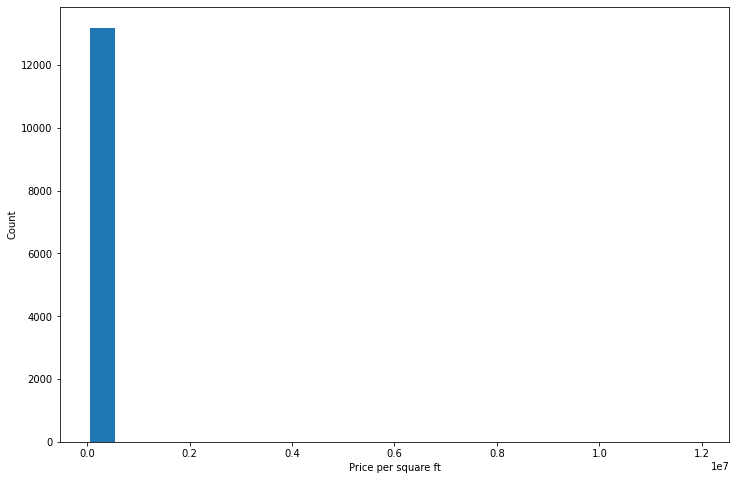

In [6]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()  

In [7]:
""" 
Above chart confirms our understanding that this dataset has some bad outliers. We see only one bar with more than 12000 data points, but on the right-hand side there are data points that have a higher value for price per square foot, but the count of these data points is very tiny compared to 12000, hence we can hardly see any bar.
"""

' \nAbove chart confirms our understanding that this dataset has some bad outliers. We see only one bar with more than 12000 data points, but on the right-hand side there are data points that have a higher value for price per square foot, but the count of these data points is very tiny compared to 12000, hence we can hardly see any bar.\n'

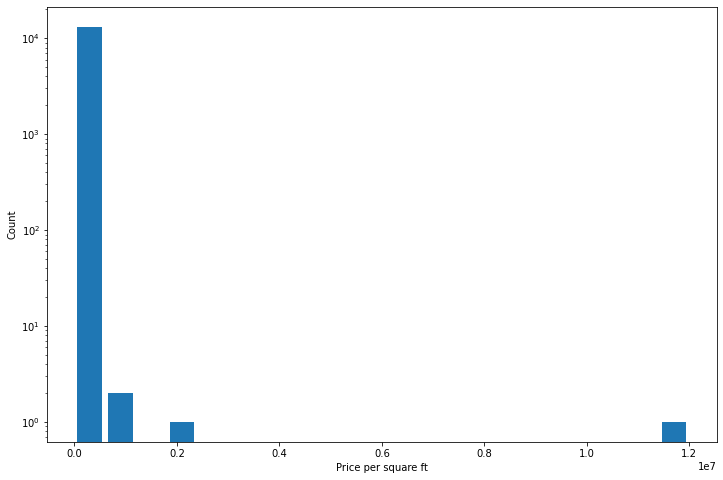

In [8]:
# Using log scale can make visualization little better
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Remove Outliers Using Percentile 

In [9]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [10]:
outliers = df[(df.price_per_sqft < lower_limit) | (df.price_per_sqft > upper_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
7575,other,1 BHK,425.0,1.0,750.0,1,176470
8307,Bannerghatta Road,5 BHK,2500.0,4.0,1400.0,5,56000
7012,other,1 BHK,650.0,1.0,500.0,1,76923


In [11]:
df2 = df[(df.price_per_sqft > lower_limit) & (df.price_per_sqft < upper_limit)]
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [12]:
df.shape[0]- df2.shape[0]

28

Remove Outliers Using 4 Standard Deviation 

In [13]:
upper_limit = df2.price_per_sqft.mean() + 4 * df2.price_per_sqft.std()
print(upper_limit)

lower_limit = df2.price_per_sqft.mean() - 4 * df2.price_per_sqft.std()
print(lower_limit)

23227.73653589432
-9900.429065502582


In [14]:
df2[(df2.price_per_sqft > upper_limit) | (df2.price_per_sqft < lower_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7908,HAL 2nd Stage,7 Bedroom,1000.0,7.0,250.0,7,25000
12799,other,5 Bedroom,1650.0,5.0,450.0,5,27272
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041
3488,Banashankari Stage III,8 Bedroom,1200.0,7.0,350.0,8,29166
12671,other,4 Bedroom,1200.0,5.0,325.0,4,27083
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285
1281,Chamrajpet,9 Bedroom,4050.0,7.0,1200.0,9,29629
6864,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961
7808,other,5 Bedroom,2400.0,5.0,625.0,5,26041


In [15]:
df3 = df2[(df2.price_per_sqft > lower_limit) & (df2.price_per_sqft < upper_limit)]
df3.shape

(13047, 7)

In [16]:
df2.shape[0] - df3.shape[0]

125

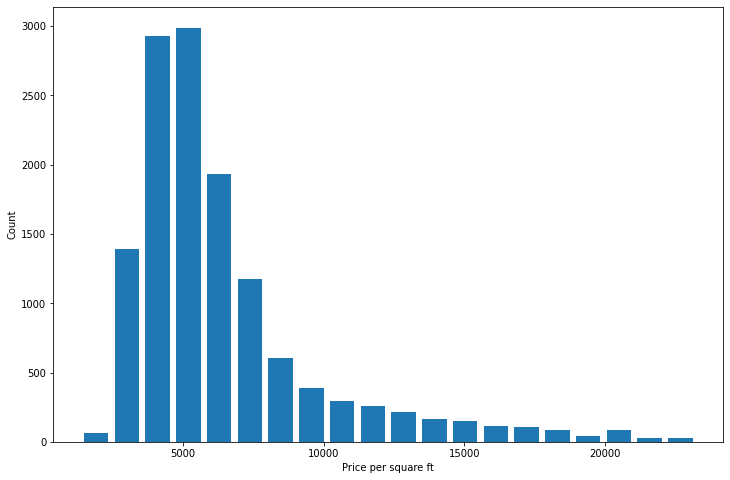

In [17]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

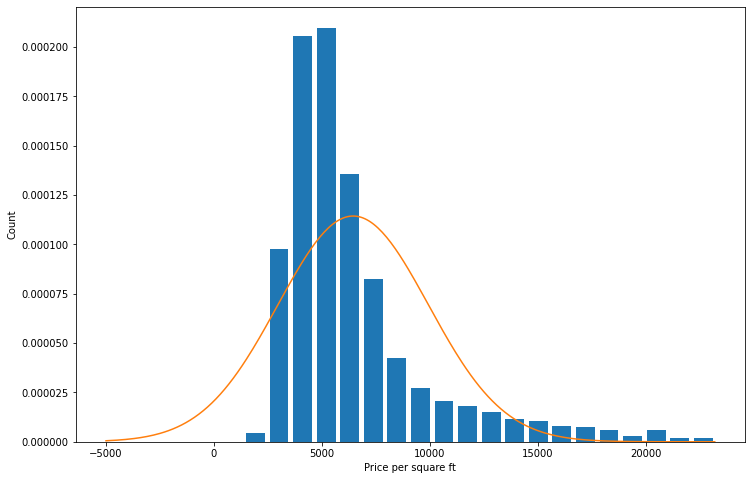

In [18]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price per square ft')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

Remove Outliers Using Z-Score = 4

In [19]:
df2['Z-Score'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()
df2.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z-Score
2890,Hoskote,4 Bedroom,1200.0,4.0,120.00,4,10000,0.805682
1260,other,2 BHK,1050.0,2.0,67.00,2,6380,-0.068499
2347,KR Puram,2 BHK,1470.0,2.0,86.00,2,5850,-0.196486
2091,Kudlu Gate,2 BHK,1238.0,2.0,55.00,2,4442,-0.536499
12475,Ramamurthy Nagar,1 Bedroom,540.0,1.0,35.00,1,6481,-0.044108
796,other,3 BHK,1352.0,3.0,135.00,3,9985,0.802060
13190,Rachenahalli,2 BHK,1050.0,2.0,52.71,2,5020,-0.396920
2674,other,2 BHK,1100.0,2.0,38.45,2,3495,-0.765187
4027,Subramanyapura,2 BHK,929.0,2.0,48.00,2,5166,-0.361663
6266,Chikkabanavar,2 BHK,600.0,1.0,25.00,2,4166,-0.603149


In [20]:
outliers_z = df2[(df2['Z-Score'] < -4) | (df2['Z-Score'] > 4)]
outliers_z.shape

(125, 8)

In [21]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z-Score
849,other,4 Bedroom,2400.0,4.0,640.0,4,26666,4.830294
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041,4.679365
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
10000,other,6 Bedroom,1200.0,5.0,280.0,6,23333,4.025420
2830,BTM 2nd Stage,4 Bedroom,1500.0,2.0,450.0,4,30000,5.635409


In [22]:
df4 = df2[(df2['Z-Score'] > -4) & (df2['Z-Score'] < 4)]
df4.shape

(13047, 8)

In [23]:
df2.shape[0] - df4.shape[0]

125

In [24]:
"In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation"

'In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation'